<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/MLWeek7_regresiInfrared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tahap 1: Memuat dan Memproses Dataset
import pandas as pd

# Membaca dataset dari URL
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/Infrared.csv"
data = pd.read_csv(url)

# Menampilkan 5 baris pertama dari dataset
print("Data Awal:")
print(data.head())

# Menghapus kolom yang tidak relevan atau tidak dapat diproses (kolom dengan tipe selain numerik)
data_cleaned = data.select_dtypes(include=['float64', 'int64'])

# Menampilkan data setelah kolom yang tidak relevan dihapus
print("\nData Setelah Menghapus Kolom yang Tidak Relevan:")
print(data_cleaned.head())

# Mengisi missing values pada kolom numerik dengan rata-rata
data_cleaned = data_cleaned.fillna(data_cleaned.mean())

# Memeriksa kembali apakah masih ada missing values
print("\nJumlah Missing Values per Kolom Setelah Pengisian:")
print(data_cleaned.isnull().sum())

Data Awal:
   Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0    Male  41-50                      White   24.0      28.0       0.8   
1  Female  31-40  Black or African-American   24.0      26.0       0.8   
2  Female  21-30                      White   24.0      26.0       0.8   
3  Female  21-30  Black or African-American   24.0      27.0       0.8   
4    Male  18-20                      White   24.0      27.0       0.8   

   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHRC1  T_FHLC1  \
0     0.7025    35.0300    35.3775      34.4000  ...  33.4775  33.3725   
1     0.7800    34.5500    34.5200      33.9300  ...  34.0550  33.6775   
2     0.8625    35.6525    35.5175      34.2775  ...  34.8275  34.6475   
3     0.9300    35.2225    35.6125      34.3850  ...  34.4225  34.6550   
4     0.8950    35.5450    35.6650      34.9100  ...  35.1600  34.3975   

   T_FHBC1  T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  \
0  33.4925  33.0025    3

In [ ]:
# Tahap 2: Membagi Data menjadi Fitur dan Target
from sklearn.model_selection import train_test_split

# Membagi data menjadi fitur (X) dan target (y)
# Menggunakan seluruh data numerik sebagai fitur, dan kolom terakhir sebagai target (y)
X = data_cleaned.drop(data_cleaned.columns[-1], axis=1)  # Semua kolom kecuali kolom terakhir
y = data_cleaned.iloc[:, -1]  # Kolom terakhir sebagai target

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan bentuk data training dan testing
print(f"\nBentuk data training (X_train, y_train): {X_train.shape}")
print(f"Bentuk data testing (X_test, y_test): {X_test.shape}")


Bentuk data training (X_train, y_train): (816, 30)
Bentuk data testing (X_test, y_test): (204, 30)


In [ ]:
# Tahap 3: Membangun Model Bagging (Random Forest)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Membuat Model Bagging (RandomForest)
bagging_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model dengan data training
bagging_model.fit(X_train, y_train)

# Memprediksi data testing
y_pred_bagging = bagging_model.predict(X_test)

# Evaluasi Model Bagging
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
rmse_bagging = np.sqrt(mse_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

# Menampilkan hasil evaluasi
print(f"\nModel Bagging (Random Forest) - MSE: {mse_bagging}, RMSE: {rmse_bagging}, R²: {r2_bagging}")


Model Bagging (Random Forest) - MSE: 0.058097827205881934, RMSE: 0.2410349086872728, R²: 0.7240953699403316


In [ ]:
# Tahap 4: Membangun Model Boosting (Gradient Boosting)
from sklearn.ensemble import GradientBoostingRegressor

# Membuat Model Boosting (GradientBoosting)
boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Melatih model dengan data training
boosting_model.fit(X_train, y_train)

# Memprediksi data testing
y_pred_boosting = boosting_model.predict(X_test)

# Evaluasi Model Boosting
mse_boosting = mean_squared_error(y_test, y_pred_boosting)
rmse_boosting = np.sqrt(mse_boosting)
r2_boosting = r2_score(y_test, y_pred_boosting)

# Menampilkan hasil evaluasi
print(f"\nModel Boosting (Gradient Boosting) - MSE: {mse_boosting}, RMSE: {rmse_boosting}, R²: {r2_boosting}")


Model Boosting (Gradient Boosting) - MSE: 0.05220963611003843, RMSE: 0.22849428025672422, R²: 0.7520581916868713


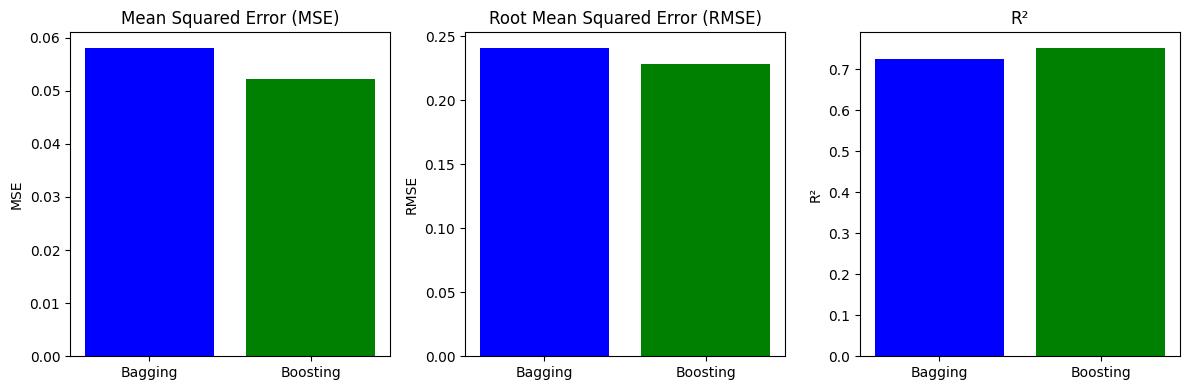

In [ ]:
# Tahap 5: Visualisasi Hasil
import matplotlib.pyplot as plt  # Pastikan library ini diimpor

# Membuat plot perbandingan MSE, RMSE, dan R²
labels = ['Bagging', 'Boosting']
mse_values = [mse_bagging, mse_boosting]
rmse_values = [rmse_bagging, rmse_boosting]
r2_values = [r2_bagging, r2_boosting]

# Plot MSE
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.bar(labels, mse_values, color=['blue', 'green'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

# Plot RMSE
plt.subplot(132)
plt.bar(labels, rmse_values, color=['blue', 'green'])
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')

# Plot R²
plt.subplot(133)
plt.bar(labels, r2_values, color=['blue', 'green'])
plt.title('R²')
plt.ylabel('R²')

# Tampilkan plot
plt.tight_layout()
plt.show()

## Penjelasan Matematis

### 1. **Mean Squared Error (MSE)**

Mean Squared Error (MSE) adalah metrik yang digunakan untuk mengukur rata-rata kuadrat dari perbedaan antara nilai yang diprediksi dan nilai yang sebenarnya. MSE dihitung dengan rumus berikut:

MSE = (1/n) * Σ (y_i - ŷ_i)²

di mana:
- `y_i` adalah nilai yang sebenarnya (nilai target),
- `ŷ_i` adalah nilai yang diprediksi oleh model,
- `n` adalah jumlah data.

### 2. **Root Mean Squared Error (RMSE)**

Root Mean Squared Error (RMSE) adalah akar kuadrat dari MSE. RMSE memberikan penilaian seberapa baik model memprediksi data dengan unit yang sama dengan data asli. RMSE dihitung dengan rumus berikut:

RMSE = √MSE

Metrik ini memberikan informasi yang lebih mudah dipahami karena berada dalam satuan yang sama dengan data aslinya.

### 3. **R-Squared (R²)**

R-Squared (R²) adalah metrik yang digunakan untuk mengukur seberapa baik model dapat menjelaskan variasi dalam data. Nilai R² berkisar antara 0 dan 1, di mana:
- Nilai 1 berarti model sempurna (prediksi identik dengan nilai sebenarnya),
- Nilai 0 berarti model tidak dapat menjelaskan variabilitas data.

R² dihitung dengan rumus berikut:

R² = 1 - (Σ (y_i - ŷ_i)²) / (Σ (y_i - ȳ)²)

di mana:
- `y_i` adalah nilai yang sebenarnya,
- `ŷ_i` adalah nilai yang diprediksi oleh model,
- `ȳ` adalah rata-rata nilai target,
- `n` adalah jumlah data.

Jika R² mendekati 1, maka model sangat baik dalam memprediksi data. Jika R² mendekati 0, maka model tidak memberikan prediksi yang baik.
